# Welcome to Image Classification

## 이 노트북은 Image classification에 대한 기본적인 instruction을 제공합니다.

### 해당 Instruction의 목표

- Image classification에서의 training step의 argument 설정
- 

#### 학습을 시작하기 전에 각 데이터에 대한 데이터 경로, 라벨을 포함하는 파일(=ground truth 파일)이 필요합니다.

#### 만약 데이터들이 폴더명이 라벨로 이루어진 폴더 안에 미리 분류되어 있는 경우 다음 함수를 통해 쉽게 ground truth 파일을 생성할 수 있습니다.

#### 그렇지 않은 경우 직접 함수를 구현하여 ground truth 파일을 생성하는 과정이 필요합니다.

In [1]:
# 예시: 아래 주석을 풀어 ground truth 파일을 생성합니다.
# data_type : 값이 png/jpg인 경우 경로 내의 png/jpg 파일에 대해서만 ground truth 파일 생성이진행됩니다.
# png 와 jpg 파일 모두에 대해 진행하고 싶은 경우 data_type = both 로 입력합니다.

# from wrapping import make_ground_truth

# # 데이터들이 미리 분류되어 있는 폴더들의 부모 디렉토리를 입력합니다.
# example_data_path = './data_path_example/'
# example_save_path = './save_path_example/train.csv'
# make_ground_truth(data_path=example_data_path, save_path=example_save_path,data_type='both')

In [ ]:
from wrapping import Wrapper

아래는 ALO 기본 설정 및 라이브러리 설치 코드입니다. 설치 에러가 발생하면 아래 셀을 재실행 하고, 지속적으로 문제가 있을 시 문의바랍니다

## Train workflow

In [ ]:
# 아래는 Train 시 필요한 라이브러리를 설치하는 코드입니다. library 설치 에러가 발생하면 아래 셀을 재실행 해주세요
wrapper = Wrapper(0)

### Input(step=0) asset을 실행합니다.
#### `run` 메소드 안에서 자동으로 iterate 하므로  `step` 값은 입력할 필요 없습니다.

In [ ]:
# IC train asset 순서에 따라 step 순서를 입력합니다. : (input(0) - train(1))
## input asset
wrapper.run()


### train asset args 변경하기

##### train asset의 args수정 및 확인

- 필요한경우 ic_args의 항목을 ***ic_args[argument명]=value입력*** 을 통해 변경할 수 있습니다.  

In [ ]:
# IC train asset 순서에 따라 step 순서(값)를 입력합니다. (input(0) - train(1))
ic_args = wrapper.get_args(step=1)

# 아래 주석을 풀어 ic_args를 수정합니다.
# ic_args['epochs] = 1024
ic_args

## 다음 과정들을 통해 IC asset들의 argument들을 customize 할 수 있습니다.

----
### arguments 설명

|args|explanation|default|example|data type|necessary|
|---|---|---|---|---|---|
|model_type|이미지 분류를 위한 네트워크 모델 타입|`mobilenetv1`|`mobilenetv1, high_resolution`|str|yes|
|input_shape|input 이미지 shape||[28,28,1]|list|yes|
|resize_shape|resizing 후의 이미지 shape|[224,224,3]|[224,224,3]|list|yes|
|epochs|training epochs 횟수|10|10|int|no|
|batch_size|미니 배치 크기|64|64|int|no|
|train_ratio|tratin/validation dataset 분할 시 train dataset 비율|`0.8`|`0 ~ 1.0`|float|no|
|rand_augmentation|random augmentation 사용 여부|False|False|bool|no|
|num_aug|이미지 당 num_aug 횟수 만큼 임의의 augmentation 변환을 선정하여 순차적으로 적용합니다 |`3`|`1~16`|int|no|
|aug_magnitude|random augmenation 적용 세기 |`7`|`0~10`|float|no|
|exclude_aug_lst|제외하고 싶은 augmentation 기법 리스트|[]|[Rotate,Solarize,Color]|list|no|

 

### A. training step에서 필요한 하이퍼파라미터를 설정합니다.


#### A-1. 기본적인 하이퍼파리미터

- model_type : 이미지 분류를 위한 신경망 모델을 선택합니다. moblienetv1 과 high_resolution 옵션을 지원하며, 고해상도 이미지를 처리하는 경우 high_resolution, 그 외 일반적인 경우엔 moblienetv1이 권장됩니다. 
- input_shape : input 이미지의 shape 입니다. 모든 이미지는 input_shape와 같은 shape 이어야 합니다.
- resize_shape : 모든 이미지들을 해당 크기로 변환합니다.
- epochs : traing epoch를 설정합니다. 너무 작으면 학습이 완료되지 않고, 너무 크면 학습 시간이 길어지고 과최적화로 인해 새로운 이미지에 대한 추론 성능이 낮아질 수 있습니다.
- batch_size : 미니 배치 사이즈를 설정합니다. 값이 커지면 학습 속도가 향상되고 강건한 모델이 만들어지지만 너무 큰 값을 설정하면 학습 환경의 메모리 용량의 한계로 인해 학습이 되지 않을 수 있습니다.
- train_ratio : input dataset을 train dataset, validation dataset으로 분할 시 train set의 비율을 설정합니다.
- rand_augmentation : 이미지 전처리 시 random augmentation을 사용할 지 여부를 설정합니다.


In [6]:
ic_args['resize_shape'] = [224,224,3]
ic_args['epochs'] = 10
ic_args['batch_size'] = 128
ic_args['train_ratio'] = 0.85
ic_args['rand_augmentation'] = True

#### A-2. Random augmentation 사용 시 파라미터를 설정합니다. 사용하지 않으면 아래 arg는 입력하지 않아도 됩니다.


- num_aug : 각 이미지 당 num_aug 횟수 만큼 임의의 augmentation 변환을 선정하여 순차적으로 적용합니다. 1~16 사이의 int값을 입력합니다.
- aug_magnitude: aug_magnitude 만큼의 세기로 augmentation을 적용합니다. 해당 값은 random augmentation에 사용되는 모든 기법에 동일하게 적용됩니다.
- exclude_aug_lst : exclude_aug_lst에 포함시키면 해당 기법은 random augmentation에서 제외됩니다. 제외 가능한 기법들은 아래 표와 같이 16개 입니다.


|번호|augmentation 기법|
|---|---|
|1|SolarizeAdd|
|2|Invert|
|3|Cutout|
|4|AutoContrast|
|5|Equalize|
|6|Rotate|
|7|Solarize|
|8|Color|
|9|Posterize|
|10|Contrast|
|11|Brightness|
|12|Sharpness|
|13|ShearX|
|14|ShearY|
|15|TranslateX|
|16|TranslateY|

- Random augmentation 논문 링크 : https://arxiv.org/abs/1909.13719



In [7]:
ic_args['num_aug'] = 8
ic_args['aug_magnitude'] = 5
ic_args['exclude_aug_lst'] = ['Rotate','Posterize','ShearY']

In [ ]:
wrapper.run(args=ic_args) # 변경한 ic_args 반영
# wrapper.data: ic asset의 결과물입니다. 다음 asset 실행 시 필요합니다. 
# wrapper.config: ic asset의 결과 config입니다. 다음 asset실행 시 필요합니다. 

# preprocess asset의 결과 dataframe은 wrapper.data['dataframe']으로 확인할 수 있습니다. 
wrapper.data['dataframe'].head(10) 

### training history를 확인하고 싶은 경우 아래 아래 cell의 함수를 사용하여 확인할 수 있습니다.

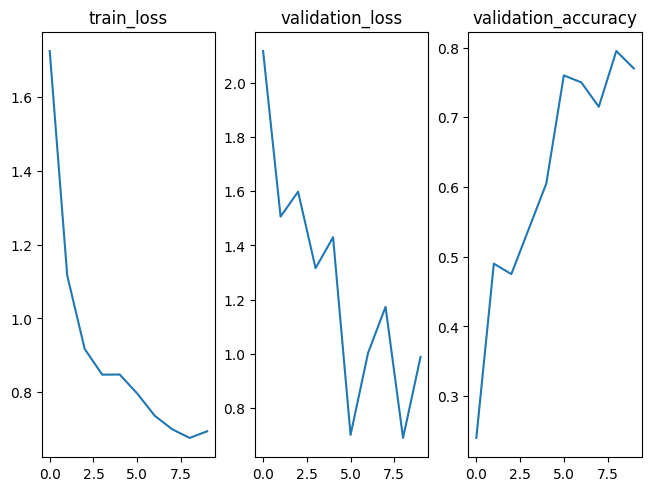

In [9]:
wrapper.plot_training_history()

<br>

## Inference workflow 

In [ ]:
# 아래는 Inference 시 필요한 라이브러리를 설치하는 코드입니다. library 설치 에러가 발생하면 아래 셀을 재실행 해주세요
wrapper = Wrapper(1)

In [ ]:
# IC inference asset 순서에 따라 step 순서를 입력합니다.: (input(0) - train(1))
## input asset
wrapper.run() 


<br>

### inference asset 
 

##### inference asset 실행 

In [ ]:
wrapper.run()

# ic asset의 결과 dataframe은 wrapper.data['dataframe']으로 확인할 수 있습니다. 
wrapper.data['dataframe'].head(10) 

## 이미지들이 각 augmentation 기법 별로 어떻게 변환 되었는지 확인하고 싶은 경우 아래 함수를 사용합니다.

- img_path_lst : 확인하고 싶은 파일들을 리스트로 입력합니다.
- resize_shape : 이미지를 해당 사이즈로 resizing 합니다.
- aug_lst : 확인하고 싶은 augmentation 기법들을 리스트로 입력합니다.


In [13]:
from wrapping import plot_auged_images

# 예시 : 아래 주석을 풀어 augmented image를 확인합니다.  
# example_data_path = wrapper.data['dataframe']['image_path'].iloc[:5]
# plot_auged_images(img_path_lst=example_data_path,
#                   resize_shape=[224,224,3],
#                   aug_lst=[ 'Cutout', 'ShearX','Rotate','Invert' ])

